**机器学习大作业（个人）-威斯康辛州乳腺癌数据集进行分类**

* ##### **1. 加载必要的库**

* ##### __2. 数据集分析、数据预处理、特征工程__

 * **2. 1. 数据清洗**

 * **2. 2. 统计特征分析**

 * **2. 3. 异常值处理**

 * **2. 4. 标签分布**

 * **2. 5. 重要统计特征的联合分布与边缘分布**

 * **2. 6. 特征相似性矩阵（热力图）**

 * **2. 7. 标签数值化处理与数据集拆分**

 * **2. 8. 标准化**

 * **2. 9. PCA降维**

*  ##### **3. 优化模型超参数**

 * **3. 1. 网格搜索寻找最佳超参数**

 * **3. 2. 主成分分析（PCA）中主成分数量对模型准确率的关系**

*  ##### **4. 可视化模型评估**

 * **4. 1. ROC 曲线、PRC曲线**

 * **4. 2. 评估指标** 

*  ##### **5. 模型**

 * **5. 1. 逻辑回归(baseline)**

 * **5. 2. 支持向量机(baseline)**

 * **5. 3. 逻辑回归+PCA**

 * **5. 4. 支持向量机（SVM）+逻辑回归+PCA**

*  ##### **6. 模型对比**


### **1. 加载必要的库**

In [82]:
import numpy as np 
import pandas as pd

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (roc_curve, precision_recall_curve, auc)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm

from plotly.subplots import make_subplots


### __2. 数据集分析、数据预处理、特征工程__

#### __2.1 数据清洗__

In [83]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


如上所示，在我观察到数据集中有些数据的个别特征是0后（即有一些缺失值），这在标准化处理时会有一些警告，所以我下一步先把数据集中的0提取出来。并且观察到最后一列特征Unnamed：32是空的，所以我先将其去除。

In [84]:
misvals_count = df.isnull().sum()
misvals_count

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [85]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
df.shape

(569, 31)

如上所示，可以看到最后一列已经去除掉，数据集已经是569行31列。

#### __2.2 统计特征分析__

In [87]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

通过 df.diagnosis.unique() 确认目标变量 diagnosis 的值为 M（恶性）和 B（良性），验证这是一个二分类任务。

In [88]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


如上所示，使用 df.describe() 生成 30 个数值特征的描述性统计信息，包括：计数（count）确认无缺失值（每个特征有 569 个观测值）、均值（mean）、标准差（std）、最小值（min）、最大值（max）和四分位数（25%, 50%, 75%）描述特征的分布范围和集中趋势。

#### __2.3 异常值处理__

在这里我将统计特征按照两种方案进行可视化。

方案一：将每一列的值缩放到统一的数值范围,便于在同一个图中 公平对比各个特征的分布差异。

In [89]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

# 标准化
names = df.columns[1:11]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[names])
values = [scaled_values[:, i].tolist() for i in range(scaled_values.shape[1])]

colors = ['indianred', 'mediumseagreen', 'dodgerblue', 'plum', 'darkkhaki',
          'lightsalmon', 'gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure([
    go.Box(
        y=val,
        name=name,
        boxpoints='outliers',
        jitter=0.5,
        whiskerwidth=0.2,
        fillcolor=color,
        marker_size=3,
        line_width=2
    )
    for name, val, color in zip(names, values, colors)
])

fig.update_layout(title="乳腺癌特征标准化分布图 - 郭金胜")

fig.show()


方案二：只画数值尺度接近的特征，保留原始数据含义（不做缩放），可以更直观地看出这些特征中是否存在异常值、分布是否集中。

In [90]:
# 选取值域相近的特征
selected = ['smoothness_mean', 'compactness_mean', 'concavity_mean', 
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

names = selected
values = [df[col].tolist() for col in names]
colors = ['mediumseagreen', 'dodgerblue', 'plum', 'darkkhaki', 'lightsalmon', 'gold']

fig = go.Figure([
    go.Box(
        y=val,
        name=name,
        boxpoints='outliers',
        jitter=0.5,
        whiskerwidth=0.2,
        fillcolor=color,
        marker_size=3,
        line_width=2
    )
    for name, val, color in zip(names, values, colors)
])


fig.update_layout(title="乳腺癌小尺度特征分布图 - 郭金胜")

fig.show()


如上图所示，展示了 smoothness_mean、compactness_mean、concavity_mean、concave points_mean、symmetry_mean 和 fractal_dimension_mean 六个特征的箱型分布。从图中可见，compactness_mean、concavity_mean 和 concave points_mean 的离群值较多，波动较大，表明它们在诊断中可能具有更强的区分能力；而 smoothness_mean、fractal_dimension_mean 等特征则较为稳定，可能贡献较小。

#### __2.4 标签分布__

In [91]:
import plotly.graph_objects as go

labels = ['Benign', 'Malignant']
values = df['diagnosis'].value_counts()

# 创建饼图
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            textinfo='label+percent',
            insidetextorientation='radial',
            marker=dict(
                colors=['#FFD700', '#40E0D0'], 
                line=dict(color='white', width=2)
            ),
            hoverinfo='label+percent+value',
            textfont=dict(size=18, color='black')
        )
    ]
)

# 添加图表标题
fig.update_layout(
    title_text='肿瘤类型分布图 - 郭金胜',
    title_font_size=24,
    legend_title_text='诊断类型',
    legend=dict(x=0.85, y=0.95)
)

fig.show()


#### __2.5 重要统计特征的联合分布与边缘分布__

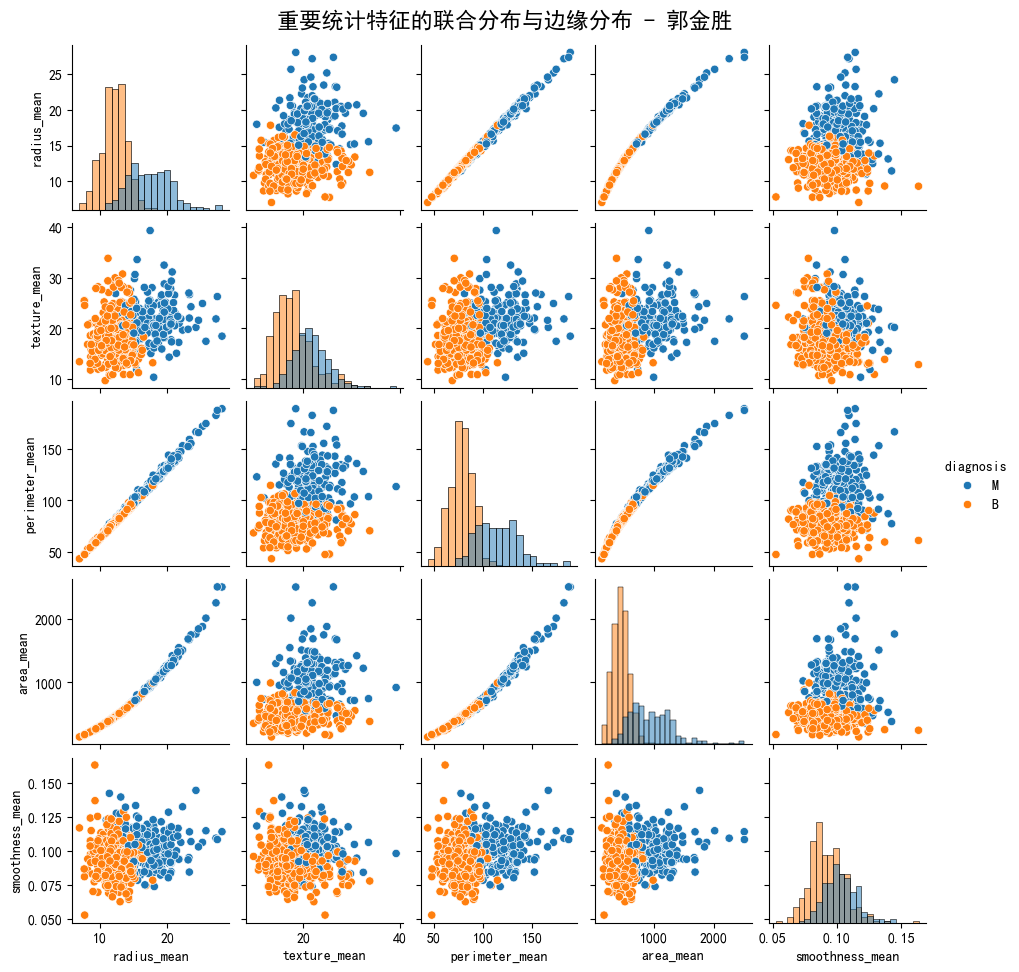

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

g = sns.pairplot(df.iloc[:, :6], hue='diagnosis', diag_kind='hist', height=1.9)

plt.suptitle('重要统计特征的联合分布与边缘分布 - 郭金胜', fontsize=16, y=1.02)

plt.show()


边际分布：对角线的直方图显示每个特征的单变量分布，比较 M 和 B 病例的数值范围、集中趋势和变异性。比如说，radius_mean 的直方图直观地显示恶性病例的平均半径偏高。
联合分布：非对角线的散点图展示特征对的二维关系，点的颜色反映 diagnosis，帮助识别特征组合是否能区分 M 和 B。

__通过这个可视化特征的直观分析，高相关性特征支持使用 PCA 降维，因为 PCA 可去除冗余信息，所以为我后面使用PCA奠定了基础。__

#### __2.6 特征相似性矩阵（热力图）__

在进行统计特征的边缘分布与联合分布的可视化后，发现有些特征存在相关性（可能有冗余信息），所以接下来我想通过相似性矩阵来观察各个特征的相关性，来进一步验证PCA降维的可行性。因为如果特征的相似性越高表明信息冗余，支持使用 PCA 降维。低相关性特征就值得保留。

In [93]:
correlation_matrix = df.iloc[:, 1:].corr()

heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    xgap=1,
    ygap=1,
    colorscale='Viridis'
)

layout = go.Layout(
    title=dict(
        text='特征相关系数热力图-郭金胜',
        x=0.5,
        xanchor='center'
    ),
    margin=dict(t=60, r=0, b=200, l=200),
    width=1000,
    height=700
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()


如上图所示，亮黄色表明相关系数接近1，表明两个特征相似性很高，在后续可以使用PCA降维去除冗余信息。

#### __2.7 标签数值化处理与数据集拆分__

In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # M:1, B:0

# 查看每个类别的数量
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)


diagnosis
0    357
1    212
Name: count, dtype: int64


In [95]:
from sklearn.model_selection import train_test_split

random_state = 42

features = df.iloc[:, 1:]
labels = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=random_state
)


以上操作将类别标签转换为数值形式，将 M 编码为 1，B 编码为 0，以适配机器学习模型。测试集占 20%，训练集占 80%。并固定随机种子，确保结果可重复。进行分层抽样，保证训练集和测试集的类别比例与原始数据集一致。

#### __2.8 标准化__

RobustScaler 缓解异常值影响，增强模型鲁棒性。

In [96]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### __2.9 PCA降维__

从相关矩阵以及联合和边际分布图中可以观察到，一些特征之间具有高度相关性，比如， `radius_mean`、`perimeter_mean` 和 `area_mean`。这些特征对因变量的影响几乎相同。在现实问题中，包含过多特征的数据集会让分类算法面临“维度灾难”，也就是需要更多的数据、计算量更大，同时也增加了过拟合的风险。特征选择（选取特定特征进行建模）和特征提取（从已有特征中提取新的特征集）都可以有效避免这些问题。在这里，我尝试主成分分析PCA降维方法。

In [97]:
pca = PCA().fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
components = np.arange(1, len(exp_var_cumul) + 1)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=components,
    y=exp_var_cumul,
    mode='lines+markers',
    line=dict(color='royalblue', width=2),
    marker=dict(size=6),
    name='Cumulative Variance'
))

# 添加 95% 参考线
fig.add_hline(
    y=0.95,
    line=dict(dash='dash', color='firebrick'),
    annotation_text='95% Threshold',
    annotation_position='top left'
)

fig.update_layout(
    title='主成分分析中的累计方差解释率 - 郭金胜',
    xaxis_title='主成分数量',
    yaxis_title='累计解释方差',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()


前七个主成分可以解释约 91% 的总方差。如果保留前 10 个或 17 个主成分，则可以保留约 95% 或甚至超过 99% 的总方差信息。如图所示，可以减少特征数量（10左右），降低计算复杂度和过拟合风险。

### __3 优化模型超参数__

#### __3.1 网格搜索寻找最佳超参数__

为了提高后续模型的性能，在此之前我选择使用网格搜索来寻找最佳的超参数组合，网格搜索通过定义超参数的离散值网格，穷举搜索所有可能的参数组合，结合交叉验证评估每种组合的性能（如准确率），选择得分最高的参数组合。该数据集较小，训练的单次计算成本低，即使穷举大量参数组合，总体计算时间可接受。

In [98]:
def modelselection(classifier, param_grid, scoring_method, X_train):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring=scoring_method,
        cv=5,
        n_jobs=-1  
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    cv_results = grid_search.cv_results_

    print(f"最优参数: {best_params}")
    print(f"最高测试分数: {best_score:.3f}")

    return cv_results, best_params, best_score


#### __3.2 主成分分析（PCA）中主成分数量对模型准确率的关系__

由2.8部分内容可知，不同的主成分数量会对模型的效果有影响，故接下来我想调查主成分数量与模型准确率以及训练时间的关系。

In [99]:
def PCA_curves(PCA_cv_score, PCA_test_score):
    n = list(range(1, len(PCA_cv_score) + 1)) 

    fig = make_subplots(
        rows=1, cols=1,
        specs=[[{"type": "scatter"}]],
    )

    # 添加交叉验证得分线
    fig.add_trace(
        go.Scatter(
            x=n,
            y=PCA_cv_score,
            mode='lines',
            line=dict(color='mediumorchid', width=2),
            name='交叉验证得分'
        ),
        row=1, col=1
    )

    # 添加测试得分线
    fig.add_trace(
        go.Scatter(
            x=n,
            y=PCA_test_score,
            mode='lines',
            line=dict(color='deepskyblue', width=2),
            name='测试得分'
        ),
        row=1, col=1
    )

    fig.update_xaxes(title_text='主成分数量', row=1, col=1)
    fig.update_yaxes(title_text='准确率', row=1, col=1)


    fig.update_layout(title_text='PCA主成分数量选择对模型性能的影响 - 郭金胜', title_x=0.5)

    fig.show()


### __4 可视化模型评估__

#### __4.1 ROC 曲线、PRC曲线__

通过特征（ROC）曲线和曲线下面积（AUC）评估模型的区分能力，比较不同模型在不同分类阈值下的性能。AUC 越高，模型区分良性和恶性病例的能力越强。一个没有预测能力的分类器：它的曲线接近对角线。

一个完美分类器：其曲线经过真正率为100%、假正率为0%的点。AUC表示ROC曲线下的面积，范围从0.5（无预测能力的分类器）到1.0（完美分类器）。

精确率-召回率曲线（Precision-Recall Curve）总结了预测模型在不同概率阈值下，真正例率（敏感性/召回率）与正例预测值（精确率）之间的权衡关系。

In [100]:
def plot_roc_prc():
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    fig = make_subplots(
        rows=1,
        cols=2,
        specs=[[{'type': 'scatter'}, {'type': 'scatter'}]],
        subplot_titles=(
            f'ROC曲线 - 郭金胜 (AUC={auc(fpr, tpr):.4f})',
            f'精确率-召回率曲线 - 郭金胜 (AUC={auc(recall, precision):.4f})'
        )
    )

    fig.add_trace(
        go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC曲线'),
        row=1,
        col=1
    )

    fig.add_shape(
        type='line',
        line=dict(dash='dash'),
        x0=0,
        x1=1,
        y0=0,
        y1=1,
        row=1,
        col=1
    )

    fig.add_trace(
        go.Scatter(x=recall, y=precision, mode='lines', name='PRC曲线'),
        row=1,
        col=2
    )

    # 添加PRC曲线的参考线（精确率为0.5的水平虚线）
    fig.add_shape(
        type='line',
        line=dict(dash='dash'),
        x0=0,
        x1=1,
        y0=0.5,
        y1=0.5,
        row=1,
        col=2
    )
    
    fig.update_xaxes(title_text="假阳性率 (1 - 特异度)", row=1, col=1)
    fig.update_yaxes(title_text="真阳性率 (召回率)", row=1, col=1)
    fig.update_xaxes(title_text="召回率", row=1, col=2)
    fig.update_yaxes(title_text="精确率", row=1, col=2)

    # 显示图表
    fig.show()

#### __4.2 评估指标__

通过混淆矩阵量化模型的分类性能，计算关键指标（准确率、敏感性、特异性、精确率、F 值）以评估模型在测试集上的表现。

In [101]:
from sklearn.metrics import confusion_matrix

def metrics(X, CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]

    Accuracy    = (tp + tn) / (tp + tn + fp + fn)
    Sensitivity = tp / (tp + fn)
    Specificity = tn / (tn + fp)
    Precision   = tp / (tp + fp)
    F_measure   = 2 * tp / (2 * tp + fp + fn)

    print(f'准确率 Accuracy    = {Accuracy:.3f}')
    print(f'召回率 Sensitivity = {Sensitivity:.3f}')  
    print(f'特异性 Specificity = {Specificity:.3f}')
    print(f'精确率Precision   = {Precision:.3f}')
    print(f'F1值 F-measure   = {F_measure:.3f}')

    return Accuracy, Sensitivity, Specificity, Precision, F_measure


### __5 模型__

#### __5.1 逻辑回归(baseline)__

In [102]:
classifier_log = LogisticRegression(
    random_state=random_state,
    solver='lbfgs',
    max_iter=1000
)

# 超参数组合
parameters_log = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

scoring = 'accuracy'  

cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)

最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.978


In [103]:
# 使用最有超参数组合
logReg_clf = LogisticRegression(
    penalty = best_param['penalty'],
    C = best_param['C'],
    random_state=random_state
    )

logReg_clf.fit(X_train, y_train)

# 评估
logReg_metrics = metrics(X_test,logReg_clf)

准确率 Accuracy    = 0.974
召回率 Sensitivity = 0.977
特异性 Specificity = 0.972
精确率Precision   = 0.955
F1值 F-measure   = 0.966


#### __5.2 支持向量机(baseline)__

In [106]:
# 使用最有超参数组合
svm_clf = SVC(C=best_param['C'],
              probability=True,
              random_state=random_state
              )
svm_clf.fit(X_train, y_train)

# 评估模型
svm_metrics = metrics(X_test, svm_clf)

准确率 Accuracy    = 0.965
召回率 Sensitivity = 0.953
特异性 Specificity = 0.972
精确率Precision   = 0.953
F1值 F-measure   = 0.953


#### __5.3 逻辑回归+PCA__

In [108]:
def compare_pca(n_components):
    cv_score = []
    test_score = []

    for n in n_components:
        print(f"PCA主成分数量为：{n}")
        
        # 配置并应用PCA转换
        pca = PCA(
            n_components=n,
            svd_solver="full",
            random_state=random_state
        )
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)

        # 超参数调优
        cv_results, best_param, best_result = modelselection(
            classifier_log,
            parameters_log, 
            scoring, 
            X_PCA_train
        )

        cv_score.append(best_result)

        # 使用最佳超参数训练逻辑回归模型
        CV_clf = LogisticRegression(
            penalty=best_param['penalty'],
            C=best_param['C'],
            random_state=random_state
        )
        CV_clf.fit(X_PCA_train, y_train)

        # 在测试集上评估模型
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)

    print(f"交叉验证得分：{cv_score}")
    print(f"测试集得分：{test_score}")

    return cv_score, test_score

In [109]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 

PCA_cv_score, PCA_test_score = compare_pca(n_components = n)

PCA主成分数量为：2
最优参数: {'C': 100, 'penalty': 'l2'}
最高测试分数: 0.921
PCA主成分数量为：4
最优参数: {'C': 1, 'penalty': 'l2'}
最高测试分数: 0.954
PCA主成分数量为：6
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.965
PCA主成分数量为：8
最优参数: {'C': 0.1, 'penalty': 'l2'}
最高测试分数: 0.967
PCA主成分数量为：10
最优参数: {'C': 1, 'penalty': 'l2'}
最高测试分数: 0.974
PCA主成分数量为：12
最优参数: {'C': 1, 'penalty': 'l2'}
最高测试分数: 0.969
PCA主成分数量为：14
最优参数: {'C': 1, 'penalty': 'l2'}
最高测试分数: 0.974
PCA主成分数量为：16
最优参数: {'C': 1, 'penalty': 'l2'}
最高测试分数: 0.978
PCA主成分数量为：18
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.978
PCA主成分数量为：20
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.976
PCA主成分数量为：22
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.976
PCA主成分数量为：24
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.978
PCA主成分数量为：26
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.978
PCA主成分数量为：28
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.978
PCA主成分数量为：30
最优参数: {'C': 10, 'penalty': 'l2'}
最高测试分数: 0.978
交叉验证得分：[0.9208791208791209, 0.9538461538461538, 0.9648351648351647, 0.9670329670329672, 0.9736263736263737,

In [110]:
PCA_curves(PCA_cv_score,PCA_test_score)

如上图所示，当主成分数量为8时，模型测试得分最高，故选择主成分为8的逻辑回归模型。

In [111]:
i =PCA_test_score.index(max(PCA_test_score))
print('最高准确率是: %.3f'%  max(PCA_test_score)+', 主成分的数量是 {:.0f}'.format((i+1)*2))

pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)

cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

# 使用最优超参数组合
logReg_PCA = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_PCA.fit(X_PCA_train, y_train)

# 评估模型
logReg_PCA_metrics = metrics(X_PCA_test,logReg_PCA)

y_score = logReg_PCA.predict_proba(X_PCA_test)[:, 1] 
plot_roc_prc()


最高准确率是: 0.991, 主成分的数量是 8
最优参数: {'C': 0.1, 'penalty': 'l2'}
最高测试分数: 0.967
准确率 Accuracy    = 0.991
召回率 Sensitivity = 0.977
特异性 Specificity = 1.000
精确率Precision   = 1.000
F1值 F-measure   = 0.988


#### __5.4 支持向量机（SVM）+逻辑回归+PCA__

接下来，我使用 VotingClassifier（投票分类器）来结合SVM和逻辑回归的预测。投票分类器可以通过“硬投票”（多数投票）或“软投票”（加权概率平均）来整合多个模型的输出。这里我选择软投票，因为它可以利用SVM和逻辑回归的概率预测，综合两者的优势。其中，SVM使用RBF核（径向基函数核），因为它适合处理非线性数据。

SVM擅长处理非线性关系，能够捕捉复杂的数据模式。逻辑回归是线性模型，计算效率高，适合PCA降维数据。投票分类器通过软投票结合两者的概率预测，既利用了SVM的非线性能力，又保留了逻辑回归的稳定性，从而提高整体分类性能。

In [126]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
log_model = LogisticRegression(random_state=42)

# 投票分类器
voting_clf = VotingClassifier(
    estimators=[('svm', svm_model), ('log', log_model)],
    voting='soft',
    weights=[1, 1]
)

# 超参数搜索空间
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100],          
    'svm__gamma': [0.001, 0.01, 0.1, 1, 'scale'],  
    'log__C': [0.01, 0.1, 1, 10, 100],          
    'log__penalty': ['l1', 'l2'],                # L1正则化
    'log__solver': ['liblinear'],                
    'weights': [[1, 1], [2, 1], [1, 2], [3, 1], [1, 3]]  
}

# 超参数调优
grid_search = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    cv=7,
    scoring='accuracy',  
    n_jobs=-1
)
grid_search.fit(X_PCA_train, y_train)

# 输出最佳参数和准确率
print("最优超参数:", grid_search.best_params_)
print("最高交叉验证准确率: %.3f" % grid_search.best_score_)

# 使用最佳模型
best_voting_clf = grid_search.best_estimator_
best_voting_clf.fit(X_PCA_train, y_train)

# 评估模型性能
SVM_log_pca_metrics = metrics(X_PCA_test, best_voting_clf)

y_score = best_voting_clf.predict_proba(X_PCA_test)[:, 1]
plot_roc_prc()

最优超参数: {'log__C': 10, 'log__penalty': 'l2', 'log__solver': 'liblinear', 'svm__C': 1, 'svm__gamma': 0.1, 'weights': [1, 3]}
最高交叉验证准确率: 0.976
准确率 Accuracy    = 0.991
召回率 Sensitivity = 0.977
特异性 Specificity = 1.000
精确率Precision   = 1.000
F1值 F-measure   = 0.988


### __6 模型对比__

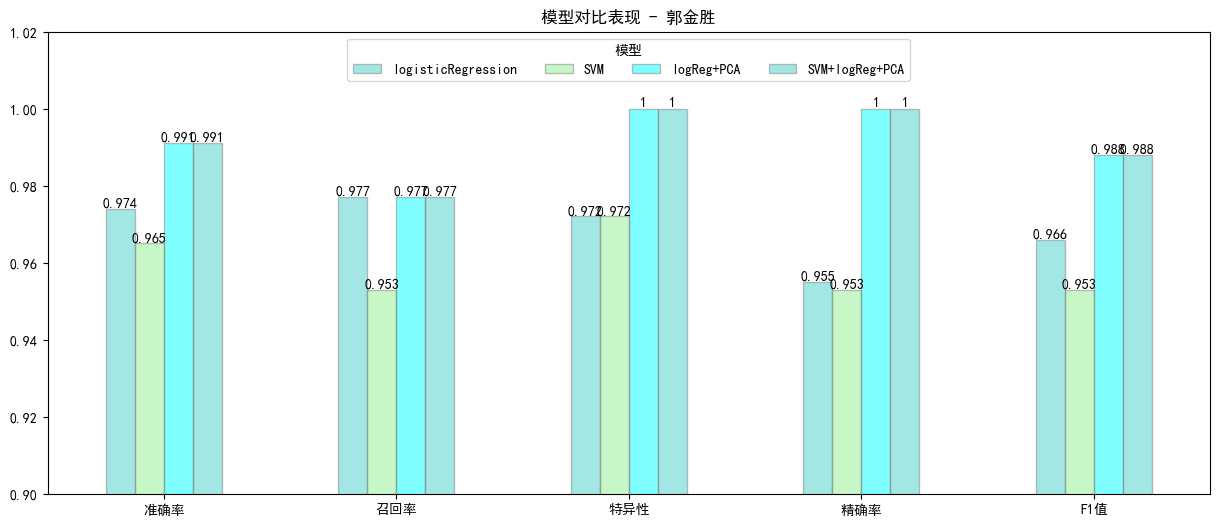

In [127]:
models_metrics = {
    'logisticRegression': [round(elem, 3) for elem in logReg_metrics],
    'SVM': [round(elem, 3) for elem in svm_metrics],
    'logReg+PCA': [round(elem, 3) for elem in logReg_PCA_metrics],
    'SVM+logReg+PCA': [round(elem, 3) for elem in SVM_log_pca_metrics]
}

index = ['准确率', '召回率', '特异性', '精确率', 'F1值']

df_scores = pd.DataFrame(data=models_metrics, index=index)

# 配置条形图
fig, ax = plt.subplots(figsize=(15, 6))
df_scores.plot(
    kind='bar',
    ax=ax,
    ylim=(0.90, 1.02),
    color=['mediumturquoise', 'lightgreen', 'cyan'],
    rot=0,
    title='模型对比表现 - 郭金胜',
    edgecolor='grey',
    alpha=0.5
)

# 图例
ax.legend(loc='upper center', ncol=5, title='模型')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

综上所述，降维的有效性在很大程度上取决于后续应用的算法以及输入方法论的数据类型。在这个乳腺癌数据集中，我先使用最基础的逻辑回归方法和支持向量机方法，起初的性能并没有很高。但分类性能在使用主成分分析后明显提高，这说明了数据特征工程的重要性。随后我再加入SVM模型，使用投票分类器集成（SVM+逻辑回归+PCA），起初的性能反而下降，我的思考是它或许引入了额外的复杂性，SVM的非线性决策边界和逻辑回归的线性决策边界的融合。如果两者的预测模式不互补，集成可能反而降低性能。于是，在我通过调整超参数后，模型性能有了大幅度提高，与逻辑回归+PCA的模型水平持平，这也进一步说明了参数在模型性能中起着关键作用。